<a href="https://colab.research.google.com/github/pavanlucky02/Corizo/blob/main/Spotify_Songs_Genre_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade seaborn matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
data = pd.read_csv('C:\\Users\\pavan kumar\\OneDrive\\Desktop\\Artificial Intelligence Intern\\spotify.csv.zip')
data.head()



,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
print(data['duration_ms'].dtype)
print(data['tempo'].dtype)
print(data['track_id'].dtype)
print(data['playlist_genre'].dtype)
print(data['playlist_name'].dtype)
print(data['duration_ms'].unique())
print(data['duration_ms'].value_counts())

int64
float64
object
object
object
[194754 162600 176616 ... 353120 210112 367432]
duration_ms
240000    37
192000    37
210000    30
180000    26
195000    25
          ..
185413     1
317760     1
220027     1
218505     1
367432     1
Name: count, Length: 19785, dtype: int64


In [ ]:
data = data[['duration_ms', 'tempo', 'loudness', 'playlist_genre', 'playlist_name']]
data = pd.get_dummies(data, columns=['playlist_genre', 'playlist_name'], drop_first=True)


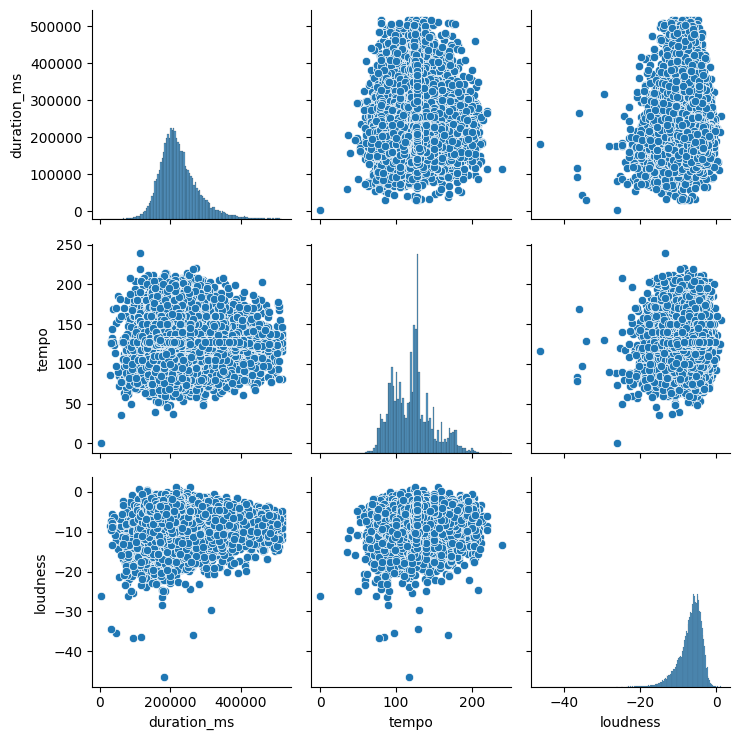

In [ ]:
# 2. Data Analysis and Visualizations
sns.pairplot(data[['duration_ms', 'tempo', 'loudness']])
plt.tight_layout()
plt.show()


C:\Users\pavan kumar\anaconda3\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from current font.
  fig.canvas.draw()
C:\Users\pavan kumar\anaconda3\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.draw()
C:\Users\pavan kumar\anaconda3\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from current font.
  fig.canvas.draw()
C:\Users\pavan kumar\anaconda3\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.draw()
C:\Users\pavan kumar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pavan kumar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from current font.
  fi

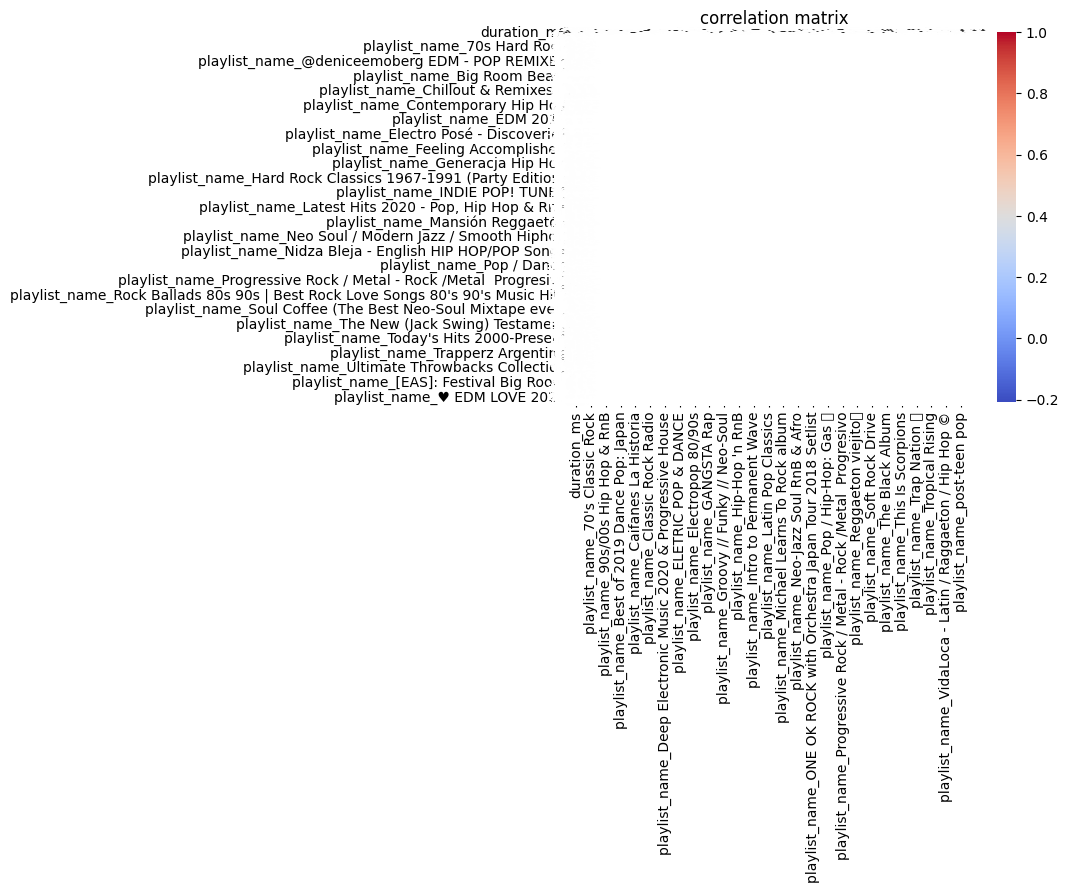

In [ ]:
# 3. Correlation Matrix
import seaborn as sns
correlation_matrix = data.corr()
#sns.set(rc={'font.family':'Arial'})
#plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [ ]:
# 4. Clustering
# Example: KMeans clustering on 'duration' and 'loudness'
X = data[['duration_ms', 'loudness']]
kmeans = KMeans(n_clusters=10, random_state=42)
data['cluster'] = kmeans.fit_predict(X)
plt.show()


C:\Users\pavan kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


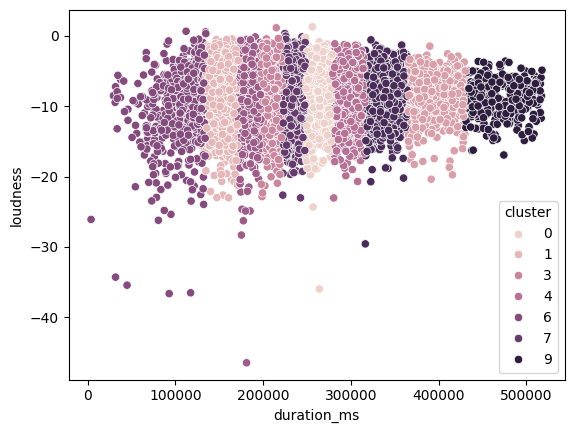

In [ ]:
# Plot clusters
sns.scatterplot(x='duration_ms', y='loudness', hue='cluster', data=data)
plt.show()

In [ ]:
X = data[['duration_ms']]
Y = data[['tempo']]
data['tempo']=data['tempo'].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(32833, 1) (26266, 1) (6567, 1)


In [ ]:
#LinearRegression Model
model = LinearRegression()



In [ ]:
# 5. Model Building (Recommendation System)
# Using Linear Regression or RandomForestRegression
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Mean Squared Error: 721.7053758470616
R-squared: -6.7765936384578396e-06


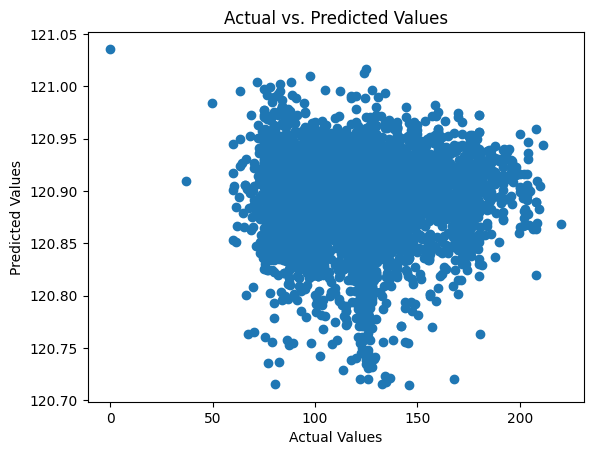

In [ ]:

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit a Linear Regression model
model = LinearRegression()#we can use RandomForestRegressor also
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model(it is an regression task)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs. predicted values
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

#Note: Accuracy score,confusion matrix,classification report is not possible when the target value is continuous , so it shows error.